# Exploratory Data Analysis of Haberman Cancer Survival Dataset

<b>Dataset:</b>https://www.kaggle.com/gilsousa/habermans-survival-data-set

<b>Data Description:</b>


The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

<b>Attribute Information:</b>

1. Age of patient at time of operation (numerical)
2. Patients year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

# 1. Objective: 

Predict whether the patient will survive after 5 years or not based on parameters like patient's age, Patient's year of treatment, number of axillary nodes and Survival status.

# Importing the required packages

In [1]:
import numpy as np        
import pandas as pd       
import matplotlib.pyplot as plt         
import seaborn as sns                   
%matplotlib inline                      
import os                               

In [2]:
# Changing the Directory
os.chdir("D:/Project Files")

In [3]:
# Loading the Haberman's Survival Data Set
data= pd.read_csv("haberman.csv", names=["age", "Patient's Year of Operation","number of axillary nodes", "Survival Status"])

<b>Observation:</b>

We have Loaded dataset(haberman.csv) using Pandas and given Column names based on the attribute information. 

# 2. High Level Statistics of the dataset

In [57]:
# How many data points and features in the dataset
data.shape

(306, 4)

<b>Observation:</b>

There are 306 (total number of rows) data points and 4 (total number of columns) features. 

In [5]:
# Column names in the dataset
data.columns

Index(['age', 'Patient's Year of Operation', 'number of axillary nodes',
       'Survival Status'],
      dtype='object')

<b>Observation:</b>

There are 4 Columns based on the given data attribute.

In [6]:
data.head(5)

,age,Patient's Year of Operation,number of axillary nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


<b>Observation:</b>

Now, we have seen the skeleton of the dataset. Let's see by checking the first 5 data points.

In [7]:
data['Survival Status'].unique()

array([1, 2], dtype=int64)

There are 2 classes in Target attribute(Survival Status) i.e. Class 1 and Class 2

In [8]:
# Number of Class in dataset
data['Survival Status'].value_counts()

1    225
2     81
Name: Survival Status, dtype: int64

<b>Observation:</b>

Of the total 306 data points, Class 1's, 225 patients survived 5 years or longer and Class 2's, 81 patients died within 5 years based on the given attribute. It is imbalance data set because class 1 has 225 data points and class 2 has data points.

In [9]:
# Calculate the Percentage of each Class
data["Survival Status"].value_counts()*100/data.shape[0]              #data.shape[0] is for total number of rows i.e.306

1    73.529412
2    26.470588
Name: Survival Status, dtype: float64

<b>Observation:</b>

1. 73.52% of Class 1 patients survived 5 years or longer 
2. 26.47% of Class 2 patients died within 5 years

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                            306 non-null int64
Patient's Year of Operation    306 non-null int64
number of axillary nodes       306 non-null int64
Survival Status                306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


<b>Observations:</b>

1. There are no missing values in the dataset.
2. The attribute(Survival Status) has integer values but we need to convert it to categorical value for analysis. The values in attribute(Survival Status) are 1 for the patient survived 5 years or longer and 2 for the patient died within 5 years. Hence, We need to mapped to 'yes' for 1 (Patient Survived 5 years or longer) and 'no' for 2 (patient died within 5 years)  
3. From the information, all elements are non-null and it has int values.

In [20]:
data["Survival Status"] = data["Survival Status"].map({1:"Patient_Survived", 2:"Pateint_died"})

<b>Observation:</b>
    Converting integer values( 1 and 2) of attribute(Survival Status) into categorical values i.e. 1= Patient_Survived and 2= Patient _died 

In [21]:
data.tail(5)

,age,Patient's Year of Operation,number of axillary nodes,Survival Status
301,75,62,1,Patient_Survived
302,76,67,0,Patient_Survived
303,77,65,3,Patient_Survived
304,78,65,1,Pateint_died
305,83,58,2,Pateint_died


<b>Observation:</b>
    checking the last 5 data points after converting integer values in categorical values and making the atrribute (Patient's Year of Operation) in YYYY Format.

In [22]:
data.describe()

,age,Patient's Year of Operation,number of axillary nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


<b>Observation: </b>
    1. There are 306 instances that we have in the dataset.
    2. The average of all the datapoints for a particular column(age) is ~52.
    3. std tells how much dispersion is there in the dat points.
    4. The minimum value of age is 30 and maximum value is 83.  Similarly, the minimum value of number of axillary nodes is 0 and maximum value is 52


# 3. Univariate Analysis

# PDF

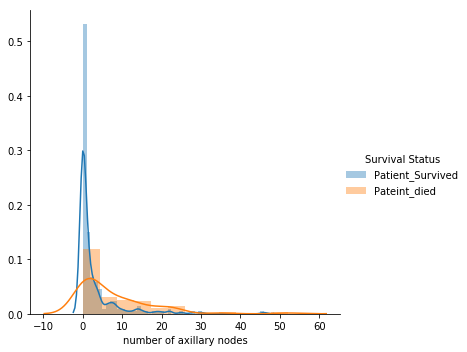

In [23]:
sns.FacetGrid(data, hue="Survival Status", size=5).map(sns.distplot, "number of axillary nodes").add_legend()
plt.show()
import warnings                              # warnings
warnings.filterwarnings("ignore")

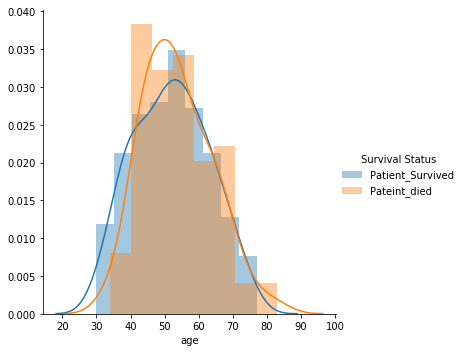

In [24]:
sns.FacetGrid(data, hue="Survival Status", size=5).map(sns.distplot, "age").add_legend()
plt.show()

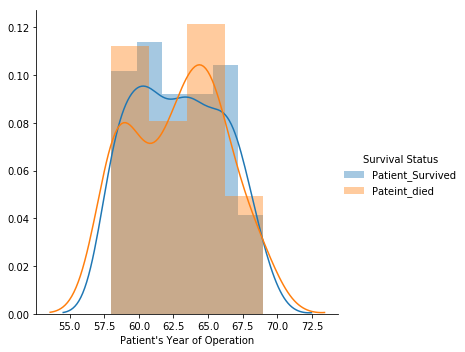

In [25]:
sns.FacetGrid(data, hue="Survival Status", size=5).map(sns.distplot, "Patient's Year of Operation").add_legend()
plt.show()

<b>Observation:</b>
1. From the above PDFs(Univariate analysis) both age and Patient's Year of Operation are not good features for useful insights as the distribution is more similar for both people who survived and also dead.
2. number of axillary nodes is the only feature that is useful to know about the survival status of patients as there is difference between the distributions of both Classes. From this distribution, we can infer that most survival patients have fallen into zero (number of axillary nodes).
3. From the Patient's Year of Operation distribution, we can observe that people who didn't survive rise and fall between 1957 and 1960 and more number of people are not survived in the year 1965.

In [18]:
Patient_Survived = data.loc[data["Survival Status"] ==1]
Patient_died = data.loc[data["Survival Status"] ==2]

In [41]:
data.tail()

,age,Patient's Year of Operation,number of axillary nodes,Survival Status
301,75,62,1,Patient_Survived
302,76,67,0,Patient_Survived
303,77,65,3,Patient_Survived
304,78,65,1,Pateint_died
305,83,58,2,Pateint_died


# CDF

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


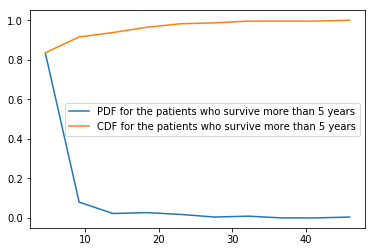

In [27]:
counts, bin_edges = np.histogram(Patient_Survived["number of axillary nodes"], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

# Compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF for the patients who survive more than 5 years', 'CDF for the patients who survive more than 5 years'])
plt.show()

<b>Observation:</b>
    1. We observe that for all features the statistics are similar for number of axillary nodes.

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


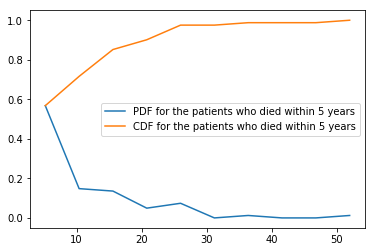

In [28]:
counts, bin_edges = np.histogram(Patient_died["number of axillary nodes"], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

# Compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF for the patients who died within 5 years', 'CDF for the patients who died within 5 years'])
plt.show()

<b>Observation:</b>
    1. Patients above 46 axillary nodes is considered as died within 5 years. 

# Performing Summary Statistics to distinguish between the Survival and not survival

In [29]:
print("Summary Statistics of Patients who survive more than 5 years or longer:")
Patient_Survived.describe()

Summary Statistics of Patients who survive more than 5 years or longer:


,age,Patient's Year of Operation,number of axillary nodes,Survival Status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [30]:
print("Summary Statistics of Patients who died within 5 years:")
Patient_died.describe()

Summary Statistics of Patients who died within 5 years:


,age,Patient's Year of Operation,number of axillary nodes,Survival Status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


<b>Observations:</b>
    1. From both the tables, we observe that almost for all the features the statistics are similar except for number_axillary_nodes.
    2. The mean of attribute(number of axillary nodes) os more for patients who died within 5 years than patient who have survived for more than 5 years or longer.
    3. From the observation of CDF's, we can conclude that patients above 46 axillary nodes considered as Patient_died within 5 years. 

# Median, Percentile, Quantile, IOQ and MAD

In [31]:
print("\nMedians:")
print(np.median(Patient_Survived["number of axillary nodes"]))

# Median with an Outlier
print(np.median(np.append(Patient_Survived["number of axillary nodes"],50)))
print(np.median(Patient_died["number of axillary nodes"]))



Medians:
0.0
0.0
4.0


In [32]:
print("\n 90th Percentiles:")
print(np.percentile(Patient_Survived["number of axillary nodes"],90))
print(np.percentile(Patient_died["number of axillary nodes"], 90))



from statsmodels import robust
print("\n Median Absolute Deviation")
print(robust.mad(Patient_Survived["number of axillary nodes"]))
print(robust.mad(Patient_died["number of axillary nodes"]))



 90th Percentiles:
8.0
20.0

 Median Absolute Deviation
0.0
5.930408874022408


In [52]:
print("\nQuantiles:")
print(np.percentile(Patient_Survived["number of axillary nodes"], np.arange(0,100,25)))
print(np.percentile(Patient_died["number of axillary nodes"], np.arange(0,100,25)))


Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]


# Box Plot and Whiskers

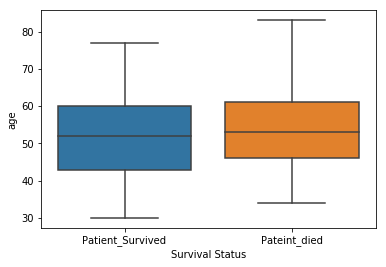

In [160]:
sns.boxplot(x="Survival Status", y ="age", data= data)

<b>Observations:</b>
    1. Patients who survived have age between 42 to 60 years.
    2. Patients who died have age between 48 to 64 years.

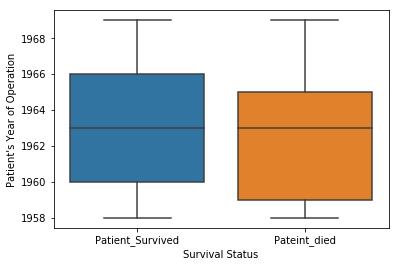

In [161]:
sns.boxplot(x="Survival Status", y ="Patient's Year of Operation", data= data)

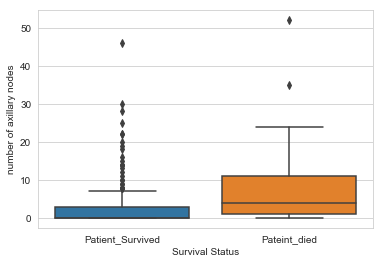

In [56]:
sns.boxplot(x="Survival Status", y="number of axillary nodes", data=data)
plt.show()

# Violin Plots

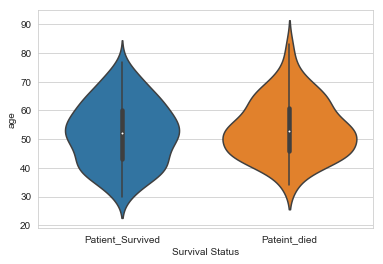

In [53]:
sns.violinplot(x="Survival Status", y="age", data=data, size=7)
plt.show()

<b>Observations:</b>
    1. More number of Patients who have Survived have age between 42 to 60 years.
    2. More number of Patients who have died have age between 45 to 61 years.

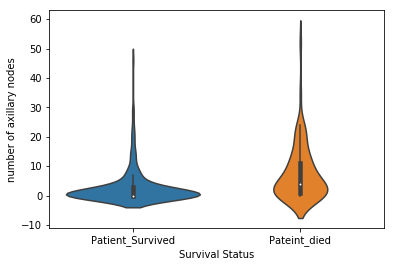

In [36]:
sns.violinplot(x="Survival Status", y="number of axillary nodes", data=data, size=7)
plt.show()

<b>Observations:</b>
    1. The number of axillary nodes of the Patient_Survived is highly densed from 0 to ~4.
    2. 80% of the patients have less than or equal to 4 number of axillary nodes (looking to Violin plot of age and number of axillary nodes.  

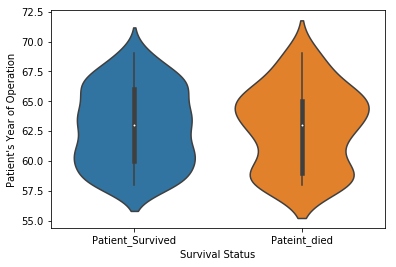

In [37]:
sns.violinplot(x="Survival Status", y="Patient's Year of Operation", data=data, size=7)
plt.show()

# Contour Plot

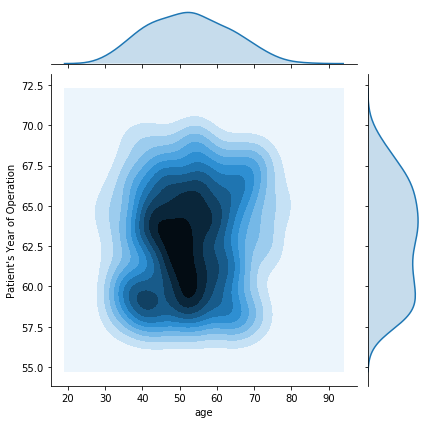

In [40]:
# 2D Density plot, contors-plot
sns.jointplot(x="age", y="Patient's Year of Operation", data=data, kind="kde")
plt.show()

<b>Observation:</b>
            There are more patients who have undergone operation during the year 1958 to 1964 and patients age between 43 to 58.

# 4. Bi-Variate Analysis

# 2-D Scatter Plots

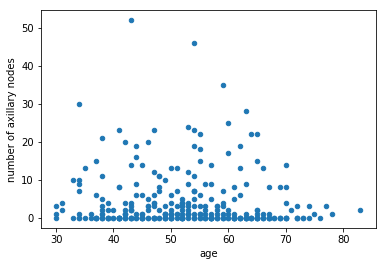

In [42]:
data.plot(kind="Scatter", x='age', y='number of axillary nodes')
plt.show()

<b>Observation:</b> Most of the patients lie on the 0 number of axillary nodes.

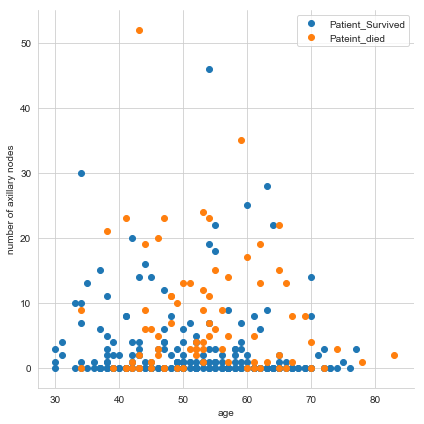

In [43]:
# 2-D Scatter Plot with color-coding for each survival Status
# Here 'sns' corresponds to seaborn
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Survival Status" ,size=6)\
.map(plt.scatter, "age", "number of axillary nodes")
plt.legend()
plt.show()

<b>Observations:</b>
    1. Most of the patients have zero number of axillary nodes
    2. Blue Points(Patient_Survived) and Orange Points(Patient_died) are not easily separated. That's why we cannot make any decision regarding patient's survival.
    3. The reason we plot 2-D Scatter plot of all pair of features to make good classification. 

# Pair-Plot

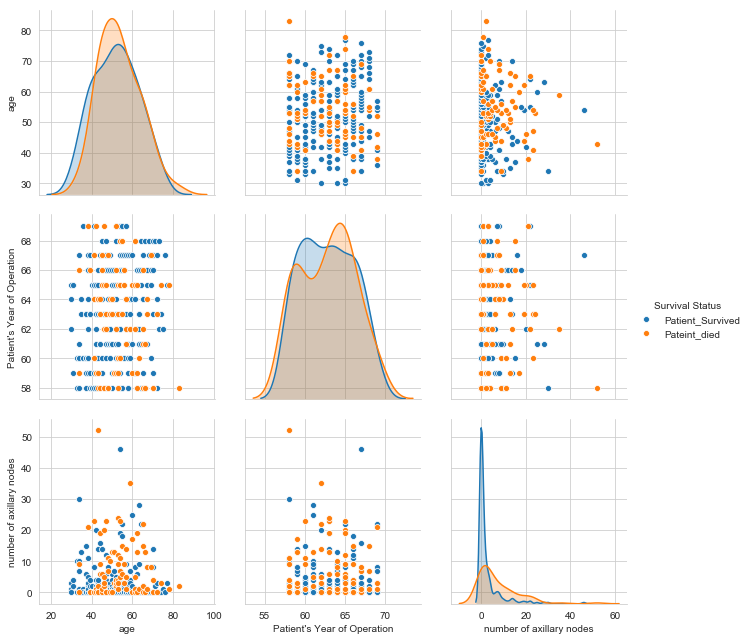

In [50]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(data, hue="Survival Status", size=3)
plt.show()
# The diagonal 

<b>Observations:</b>
    1. age versus number of axillary nodes is helpful to get the insight that most patients who Survived have 0 number of        axillary nodes.
    2. With Pair plot, we cannot distinguish the data easily because most of them are overlapping.

# Conclusion:

1. There are 306 observations with 4 features in the Haberman dataset.

2. The Haberman dataset is imbalanced dataset as we see in attribute(Survival Status):
    i. 2225 patients belongs to Survival Status 1 (patients who survived 5 years or longer)
    ii. 81 patients belongs to Survival Status 2 (patients who died within 5 years)

3. Uni-Variate analysis (PDF): 
    i. Attributes age and Patient's Year of Operation are not useful features to get insights as the distribution is more similar for both patients who survived and dead.
    ii. number of axillary nodes is the only feature that is useful to know about the survival status of patients.From this, we can infer that most survival patients have fallen into zero (number of axillary nodes).
    iii. From the Patient's Year of Operation distribution, we observe that more number of people are not survived in the year of operation 1965.

4. Uni-Variate analysis (CDF):
    i. While plotting CDF, we observe that Patients above 46 axillary nodes is considered as died within 5 years. 

5. Boxplot: With Plotting Box-Plot, we have conclude two observations:
    i. Survived Patients have age between 42 to 60 years.
    ii. Patients who died have age between 48 to 64 years.

6. Violin Plot:
    i. With plotting Violin plot, we see 80% of the patients have less than or equal to 4 number of axillary nodes (looking to Violin plot of age and number of axillary nodes.
    
7. Contour Plot:
    i. There seems to be more patients who have undergone operation during the year 1958 to 1964 and the patients age between 43 to 58.

8. Bi-Variate Analysis(Scatter Plot):
    i. Most of the patients have zero number of axillary nodes
    ii. We cannot distinguish between the patients who survived and patients who died.
    
9. Bi-Variate Analysis (Pair-Plot):
    i. age versus number of axillary nodes is helpful features to get the insight that most patients who Survived have 0 number of        axillary nodes.
    ii. age and Patient's Year of Operation have overlapping Curves thats why it is difficult for classifying the Survival Status.
    
10. Mean age of patients who survived is 52 years and who died is 54 years (as we performed Summary Statistics)
